In [1]:
# 大作业-郎巴图
# 下载安装pyecharts, wordcloud

项目名称：基于历年来新股发行资料的统计与预测

项目针对的问题：本项目旨在分析、统计历年来新股发行规模、上市公司地区、承销商排行等因素，并对于公司上市所需支付的交易费用进行预测。本次大作业立项与第5次课后大作业并不一致，系本人因后续学习内容的发展相应更改了选题

预期达到的效果：分析发行数据，给出可视化图表，预测上市公司交易费用

拟采用的数据集：2015年12月1日-2020年11月30日新股发行资料，以上市日期为标准，数据来自于WIND

数据收集方法：由于数据来源于WIND，为数据库软件，而非普通的网页，难以爬取，故直接由软件下载相关数据并导入

朝哥爱我文件夹里有作业的整体要求，具体步骤我会在下面用文字描述

本项目所需导入的相关库如下：

In [2]:
# for data
import pandas as pd
import numpy as np
import random

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from pyecharts.charts import Map,Geo
from pyecharts import options as opts
from wordcloud import WordCloud

# for machine learning
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#for presenting Chinese characters
from matplotlib import rcParams
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline
#其他库如需要请尽情导入

1.数据清洗导入与清洗

In [3]:
#数据导入并查看
filepath = "IPO.csv"
data = pd.read_csv(
    filepath, 
    parse_dates=['招股日期', '网上发行日期', '上市日期', '发行公告日期']
)
data.head()

,代码,名称,申购代码,招股日期,网上发行日期,上市日期,上市板,发行价格,发行市盈率,行业PE(披露值),...,证监会行业(2012版),证监会行业,Wind行业,证券类型,交易所,上市首日涨跌幅%,上市5日涨跌幅%,上市10日涨跌幅%,上市20日涨跌幅%,Unnamed: 50
0,300910.SZ,瑞丰新材,300910.0,2020-11-09,2020-11-18,2020-11-27,创业板,30.26,47.43,28.90,...,化学原料和化学制品制造业,NaN,材料--材料Ⅱ--化工--基础化工,A股,深圳,240.38,(15.53),(26.46),NaN,NaN
1,003004.SZ,声迅股份,3004.0,2020-11-09,2020-11-17,2020-11-26,中小企业板,20.26,22.99,65.77,...,软件和信息技术服务业,NaN,信息技术--技术硬件与设备--电子设备、仪器和元件--电子设备和仪器,A股,深圳,43.98,61.06,36.20,NaN,NaN
2,605177.SH,东亚药业,707177.0,2020-11-06,2020-11-16,2020-11-25,主板,31.13,22.99,53.30,...,医药制造业,NaN,医疗保健--制药、生物科技与生命科学--制药--西药,A股,上海,44.01,10.33,(2.61),NaN,NaN
3,300908.SZ,仲景食品,300908.0,2020-10-30,2020-11-11,2020-11-23,创业板,39.74,46.27,59.70,...,食品制造业,NaN,日常消费--食品、饮料与烟草--食品--食品加工与肉类,A股,深圳,203.98,(14.75),(14.06),NaN,NaN
4,688777.SH,中控技术,787777.0,2020-11-03,2020-11-11,2020-11-24,科创板,35.73,64.04,65.91,...,软件和信息技术服务业,NaN,信息技术--软件与服务--信息技术服务--信息科技咨询与其它服务,A股,上海,204.03,6.97,6.37,NaN,NaN


In [4]:
data.shape

(1435, 51)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20195 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30721 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21517 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30003 missing from current font.
  font.set_text(s, 0.0, f

/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 38144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21450 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20445 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 33616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib

/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22238 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25320 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20363 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 39044 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


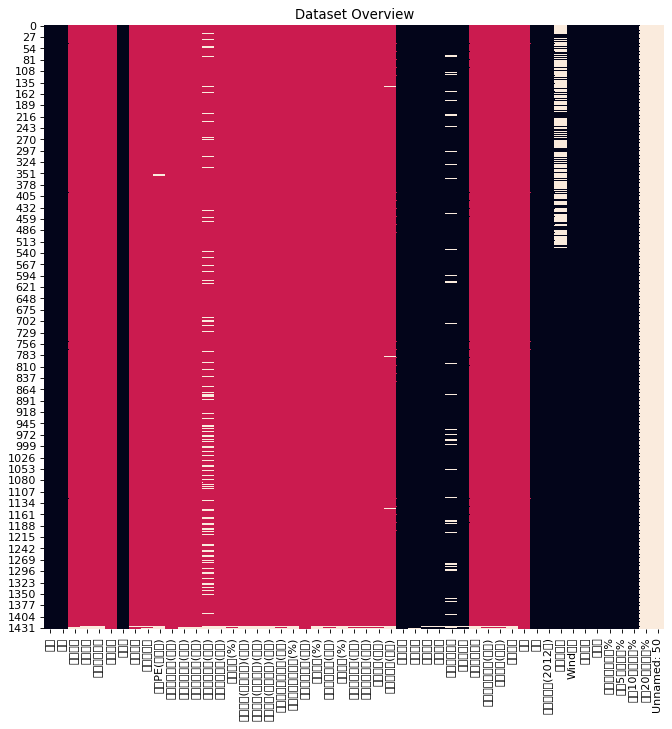

 Categerocial   Numeric   NaN 


In [5]:
#直观看一下总体的data的热力图，类别空值之类的，其实不用也可以
def utils_recognize_type(df, col):
    if (df[col].dtype == "O"):
        return "cat"
    else:
        return "num" 
def Data_overview(df):
    dic_cols = {col:utils_recognize_type(data, col) for col in data.columns}
    heatmap = data.isnull()
    for k,v in dic_cols.items():
        if v == "num":
            heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
        else:
            heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
    plt.figure(figsize=[10, 10], dpi=80)
    sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
    plt.show()
    print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")
Data_overview(data)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   代码              1435 non-null   object        
 1   名称              1435 non-null   object        
 2   申购代码            1430 non-null   float64       
 3   招股日期            1428 non-null   datetime64[ns]
 4   网上发行日期          1428 non-null   datetime64[ns]
 5   上市日期            1435 non-null   datetime64[ns]
 6   上市板             1435 non-null   object        
 7   发行价格            1433 non-null   float64       
 8   发行市盈率           1431 non-null   float64       
 9   行业PE(披露值)       1423 non-null   float64       
 10  发行数量总计(万股)      1435 non-null   float64       
 11  新股发行数量(万股)      1430 non-null   float64       
 12  老股转让数量(万股)      1430 non-null   float64       
 13  网下配售数量(万股)      1201 non-null   float64       
 14  网上发行数量(万股)      1428 non-null   float64       
 15  回拨比例

In [7]:
#括号变负号，string变float
data[['上市首日涨跌幅%','上市5日涨跌幅%','上市10日涨跌幅%']] \
= data[['上市首日涨跌幅%','上市5日涨跌幅%','上市10日涨跌幅%']] \
.replace( '[\$,)]','', regex=True ) \
.replace( '[(]','-',   regex=True ) \
.astype(float)

In [8]:
data.dtypes

代码                        object
名称                        object
申购代码                     float64
招股日期              datetime64[ns]
网上发行日期            datetime64[ns]
上市日期              datetime64[ns]
上市板                       object
发行价格                     float64
发行市盈率                    float64
行业PE(披露值)                float64
发行数量总计(万股)               float64
新股发行数量(万股)               float64
老股转让数量(万股)               float64
网下配售数量(万股)               float64
网上发行数量(万股)               float64
回拨比例(%)                  float64
预计募资(上市公司)(亿元)           float64
募资总额(上市公司)(亿元)           float64
募资净额(上市公司)(亿元)           float64
上市公司发行费用(万元)             float64
上市公司发行费率(%)              float64
老股转让费用(万元)               float64
转让费率(%)                  float64
发行费用合计(万元)               float64
发行费率(%)                  float64
承销及保荐费(万元)               float64
审计及验资费(万元)               float64
法律费用(万元)                 float64
信息披露费(万元)                float64
发行方式                      object
承销方式      

In [9]:
#查看空值
data.isna().sum()

代码                   0
名称                   0
申购代码                 5
招股日期                 7
网上发行日期               7
上市日期                 0
上市板                  0
发行价格                 2
发行市盈率                4
行业PE(披露值)           12
发行数量总计(万股)           0
新股发行数量(万股)           5
老股转让数量(万股)           5
网下配售数量(万股)         234
网上发行数量(万股)           7
回拨比例(%)              5
预计募资(上市公司)(亿元)       7
募资总额(上市公司)(亿元)       7
募资净额(上市公司)(亿元)       7
上市公司发行费用(万元)         4
上市公司发行费率(%)          7
老股转让费用(万元)           0
转让费率(%)              7
发行费用合计(万元)           4
发行费率(%)              7
承销及保荐费(万元)           4
审计及验资费(万元)           4
法律费用(万元)             4
信息披露费(万元)           20
发行方式                 0
承销方式                 3
主承销商                 2
审计机构                 2
资产评估机构              92
律师事务所                3
发行公告日期               7
承销商认购余股(万股)          5
包销金额(万元)             5
包销比例                 7
面值                   0
省份                   0
证监会行业(2012版)         0
证监会行业              353
Wind行业     

In [10]:
#删除全部为空值的列
data.dropna(how='all', axis=1, inplace=True)
#处理“招股日期”列为空的情况，该类新股发行数据为比例换股等情况，并非常规的IPO
data.dropna(subset=['招股日期'], inplace=True)
#“证监会行业”列删除
data.drop(['证监会行业'], axis = 1, inplace= True)
data.isna().sum()

代码                  0
名称                  0
申购代码                0
招股日期                0
网上发行日期              0
上市日期                0
上市板                 0
发行价格                0
发行市盈率               0
行业PE(披露值)           5
发行数量总计(万股)          0
新股发行数量(万股)          0
老股转让数量(万股)          0
网下配售数量(万股)        227
网上发行数量(万股)          0
回拨比例(%)             0
预计募资(上市公司)(亿元)      0
募资总额(上市公司)(亿元)      0
募资净额(上市公司)(亿元)      0
上市公司发行费用(万元)        0
上市公司发行费率(%)         0
老股转让费用(万元)          0
转让费率(%)             0
发行费用合计(万元)          0
发行费率(%)             0
承销及保荐费(万元)          0
审计及验资费(万元)          0
法律费用(万元)            0
信息披露费(万元)          14
发行方式                0
承销方式                0
主承销商                0
审计机构                0
资产评估机构             86
律师事务所               1
发行公告日期              0
承销商认购余股(万股)         0
包销金额(万元)            0
包销比例                0
面值                  0
省份                  0
证监会行业(2012版)        0
Wind行业              0
证券类型                0
交易所                 0
上市首日涨跌幅%  

In [11]:
#“资产评估机构”、“律师事务所”列空值填充为“暂缺”
#“网下配售数量(万股)”、“信息披露费(万元)”列空值填充为0
data.fillna({'资产评估机构': '暂缺', '律师事务所': '暂缺', '网下配售数量(万股)': 0, '信息披露费(万元)': 0}, inplace=True)
data.isna().sum()

代码                0
名称                0
申购代码              0
招股日期              0
网上发行日期            0
上市日期              0
上市板               0
发行价格              0
发行市盈率             0
行业PE(披露值)         5
发行数量总计(万股)        0
新股发行数量(万股)        0
老股转让数量(万股)        0
网下配售数量(万股)        0
网上发行数量(万股)        0
回拨比例(%)           0
预计募资(上市公司)(亿元)    0
募资总额(上市公司)(亿元)    0
募资净额(上市公司)(亿元)    0
上市公司发行费用(万元)      0
上市公司发行费率(%)       0
老股转让费用(万元)        0
转让费率(%)           0
发行费用合计(万元)        0
发行费率(%)           0
承销及保荐费(万元)        0
审计及验资费(万元)        0
法律费用(万元)          0
信息披露费(万元)         0
发行方式              0
承销方式              0
主承销商              0
审计机构              0
资产评估机构            0
律师事务所             0
发行公告日期            0
承销商认购余股(万股)       0
包销金额(万元)          0
包销比例              0
面值                0
省份                0
证监会行业(2012版)      0
Wind行业            0
证券类型              0
交易所               0
上市首日涨跌幅%          0
上市5日涨跌幅%          0
上市10日涨跌幅%         0
dtype: int64

In [12]:
#最后，“行业PE(披露值)”要麻烦一点，我想用“证监会行业(2012版)”的分类，分别统计出来不同分类的平均“行业PE(披露值)”，然后再根据空值对应的分类相应填充“行业PE(披露值)”列
#temp = data[data['行业PE(披露值)'].isna()]['证监会行业(2012版)']
#temp
data['行业PE(披露值)'] = data['行业PE(披露值)']\
.fillna(data.groupby('证监会行业(2012版)')['行业PE(披露值)']\
.transform('mean'))
#查看是否还存在空值
data.isna().sum()

代码                0
名称                0
申购代码              0
招股日期              0
网上发行日期            0
上市日期              0
上市板               0
发行价格              0
发行市盈率             0
行业PE(披露值)         3
发行数量总计(万股)        0
新股发行数量(万股)        0
老股转让数量(万股)        0
网下配售数量(万股)        0
网上发行数量(万股)        0
回拨比例(%)           0
预计募资(上市公司)(亿元)    0
募资总额(上市公司)(亿元)    0
募资净额(上市公司)(亿元)    0
上市公司发行费用(万元)      0
上市公司发行费率(%)       0
老股转让费用(万元)        0
转让费率(%)           0
发行费用合计(万元)        0
发行费率(%)           0
承销及保荐费(万元)        0
审计及验资费(万元)        0
法律费用(万元)          0
信息披露费(万元)         0
发行方式              0
承销方式              0
主承销商              0
审计机构              0
资产评估机构            0
律师事务所             0
发行公告日期            0
承销商认购余股(万股)       0
包销金额(万元)          0
包销比例              0
面值                0
省份                0
证监会行业(2012版)      0
Wind行业            0
证券类型              0
交易所               0
上市首日涨跌幅%          0
上市5日涨跌幅%          0
上市10日涨跌幅%         0
dtype: int64

In [13]:
data[data['行业PE(披露值)'].isna()]

,代码,名称,申购代码,招股日期,网上发行日期,上市日期,上市板,发行价格,发行市盈率,行业PE(披露值),...,包销比例,面值,省份,证监会行业(2012版),Wind行业,证券类型,交易所,上市首日涨跌幅%,上市5日涨跌幅%,上市10日涨跌幅%
355,601816.SH,京沪高铁,780816.0,2019-12-25,2020-01-06,2020-01-16,主板,4.88,23.39,NaN,...,0.21,1.0,北京,铁路运输业,工业--运输--公路与铁路运输--铁路运输,A股,上海,38.73,4.14,14.18
356,601816.SH,京沪高铁,780816.0,2019-12-25,2020-01-06,2020-01-16,主板,4.88,23.39,NaN,...,0.21,1.0,北京,铁路运输业,工业--运输--公路与铁路运输--铁路运输,A股,上海,38.73,4.14,14.18
357,601816.SH,京沪高铁,780816.0,2019-12-25,2020-01-06,2020-01-16,主板,4.88,23.39,NaN,...,0.21,1.0,北京,铁路运输业,工业--运输--公路与铁路运输--铁路运输,A股,上海,38.73,4.14,14.18


In [43]:
data.fillna({'行业PE(披露值)': 21.67}, inplace=True)
data.isna().sum()

代码                0
名称                0
申购代码              0
招股日期              0
网上发行日期            0
上市日期              0
上市板               0
发行价格              0
发行市盈率             0
行业PE(披露值)         0
发行数量总计(万股)        0
新股发行数量(万股)        0
老股转让数量(万股)        0
网下配售数量(万股)        0
网上发行数量(万股)        0
回拨比例(%)           0
预计募资(上市公司)(亿元)    0
募资总额(上市公司)(亿元)    0
募资净额(上市公司)(亿元)    0
上市公司发行费用(万元)      0
上市公司发行费率(%)       0
老股转让费用(万元)        0
转让费率(%)           0
发行费用合计(万元)        0
发行费率(%)           0
承销及保荐费(万元)        0
审计及验资费(万元)        0
法律费用(万元)          0
信息披露费(万元)         0
发行方式              0
承销方式              0
主承销商              0
审计机构              0
资产评估机构            0
律师事务所             0
发行公告日期            0
承销商认购余股(万股)       0
包销金额(万元)          0
包销比例              0
面值                0
省份                0
证监会行业(2012版)      0
Wind行业            0
证券类型              0
交易所               0
上市首日涨跌幅%          0
上市5日涨跌幅%          0
上市10日涨跌幅%         0
dtype: int64

Text(0.5, 1.0, '募资总额(上市公司)(亿元)')

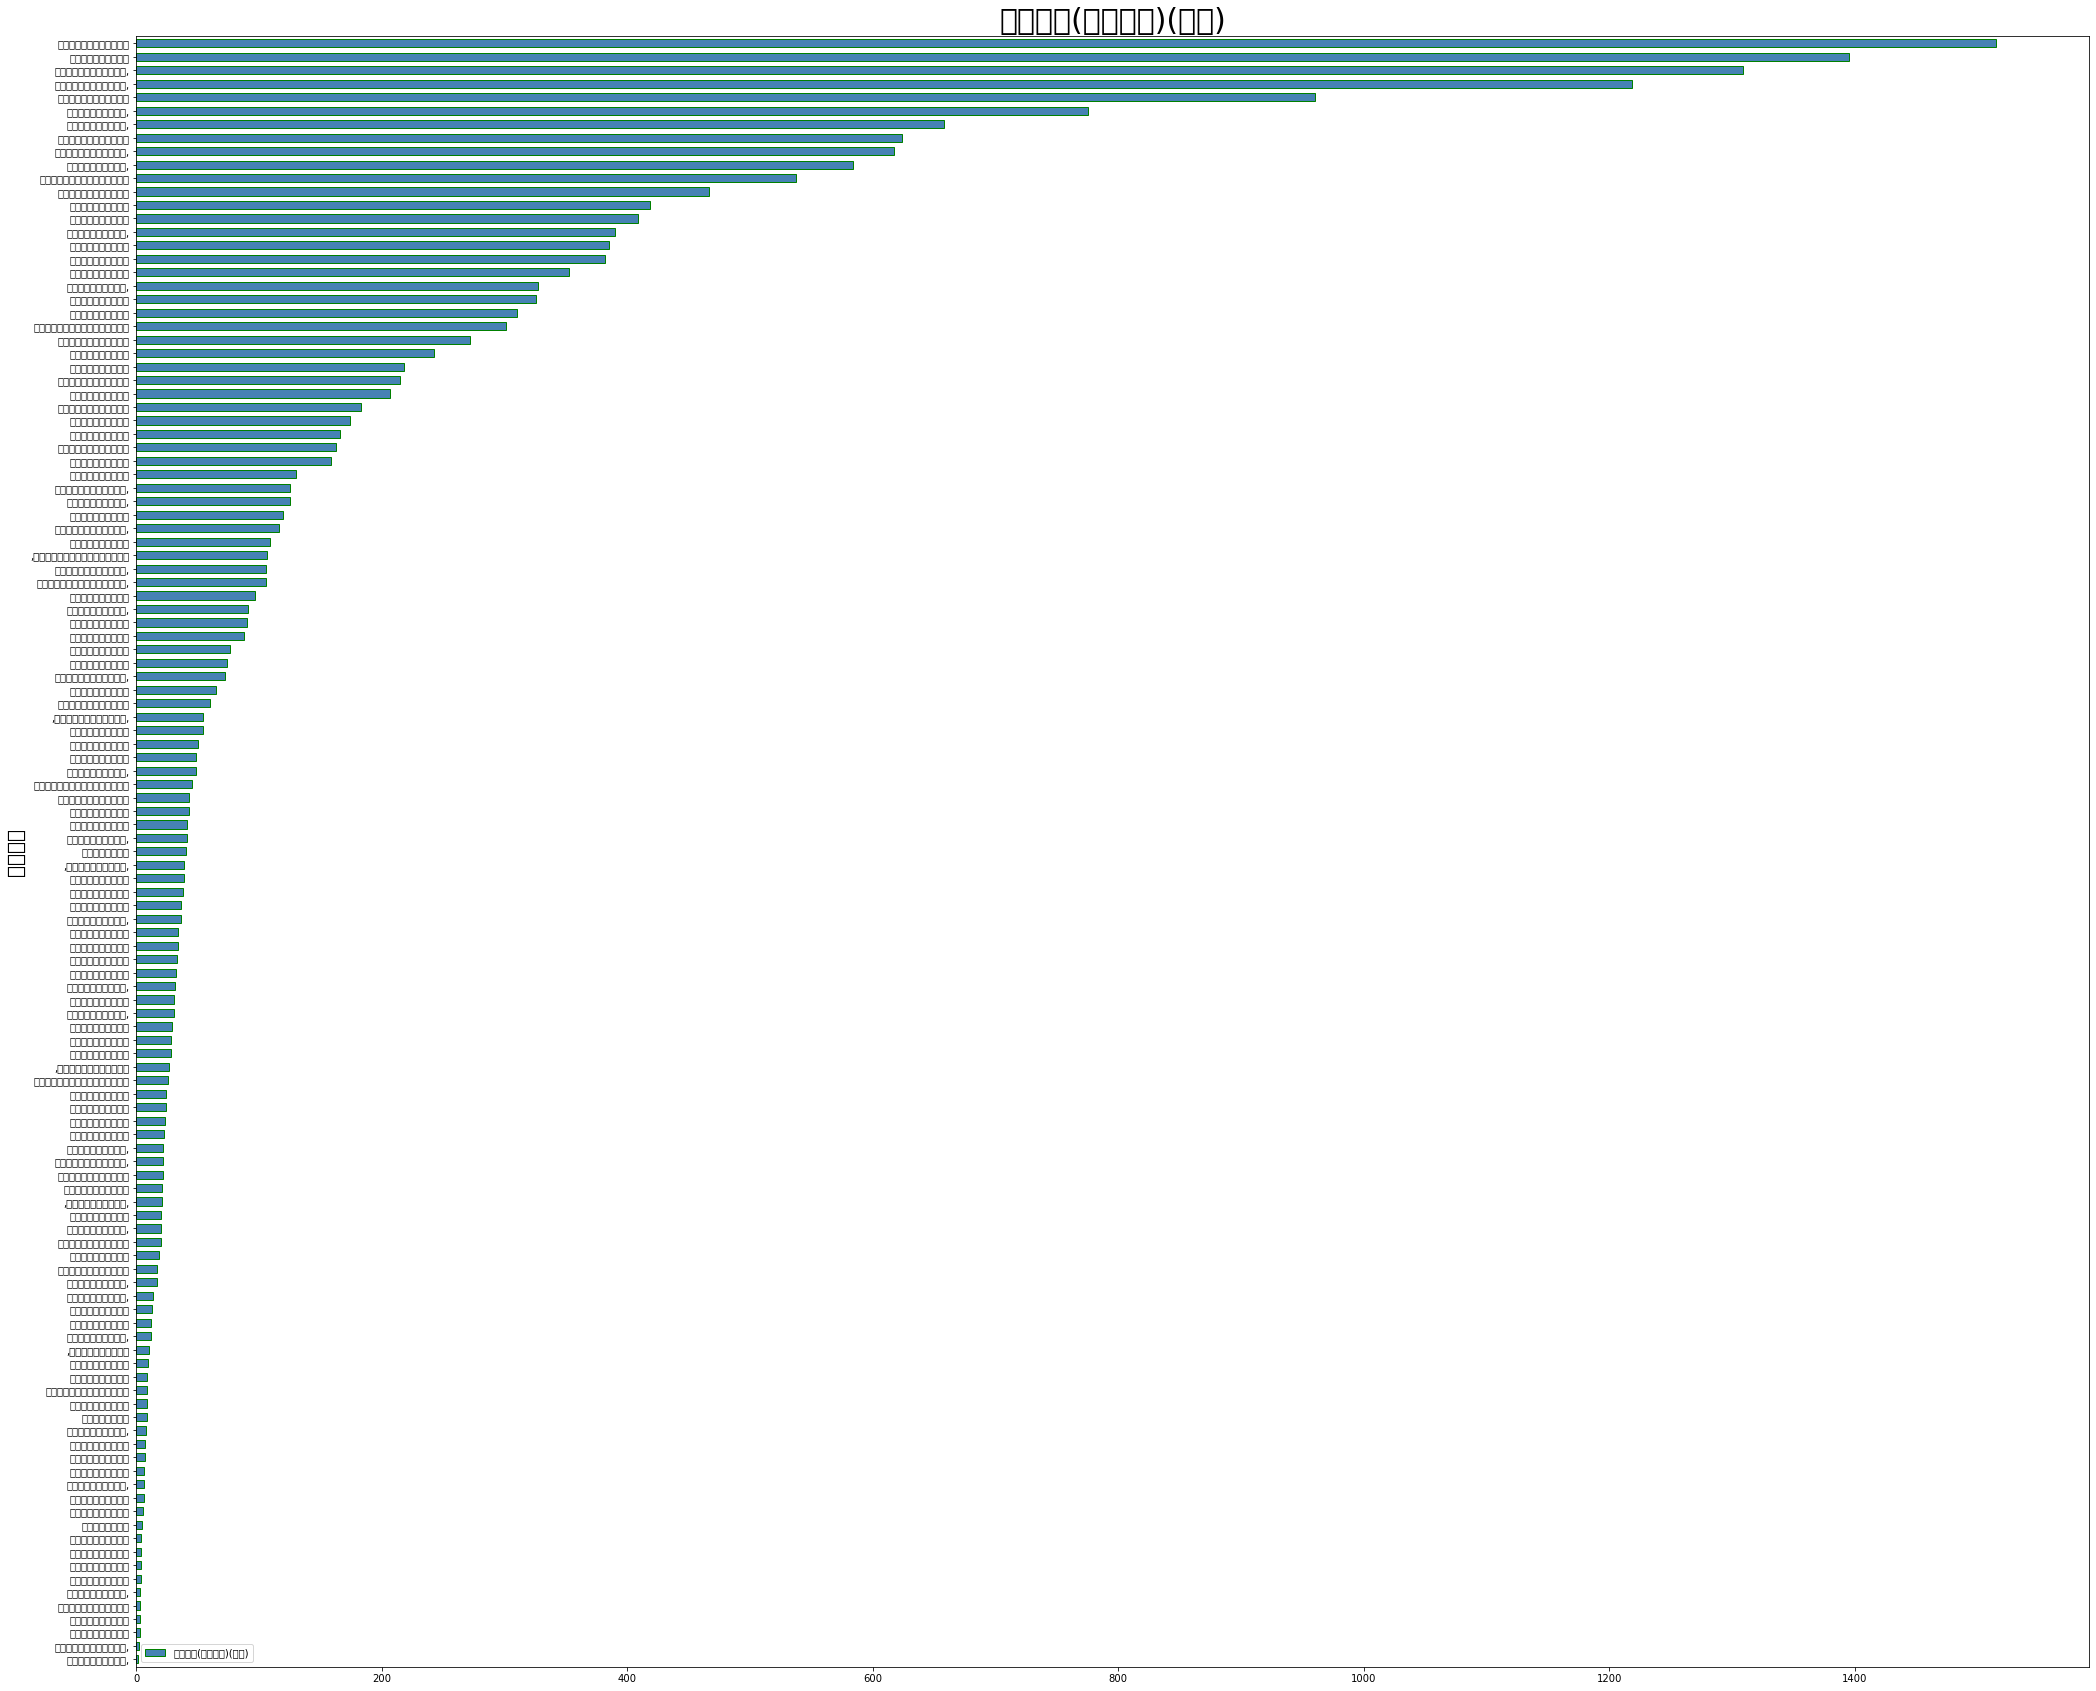

In [19]:
#统计“主承销商” 和“募资总额(上市公司)(亿元)”
data.groupby(['主承销商'])\
.agg({'募资总额(上市公司)(亿元)' : sum})\
.sort_values('募资总额(上市公司)(亿元)', ascending = True)\
.plot(kind = 'barh', legend = True, width=0.6, \
      figsize = [35,30], color = 'steelblue', edgecolor = 'green')
plt.ylabel('主承销商', fontsize=20)
plt.title('募资总额(上市公司)(亿元)', fontsize=30)

Text(0.5, 1.0, '承销及保荐费(万元)')

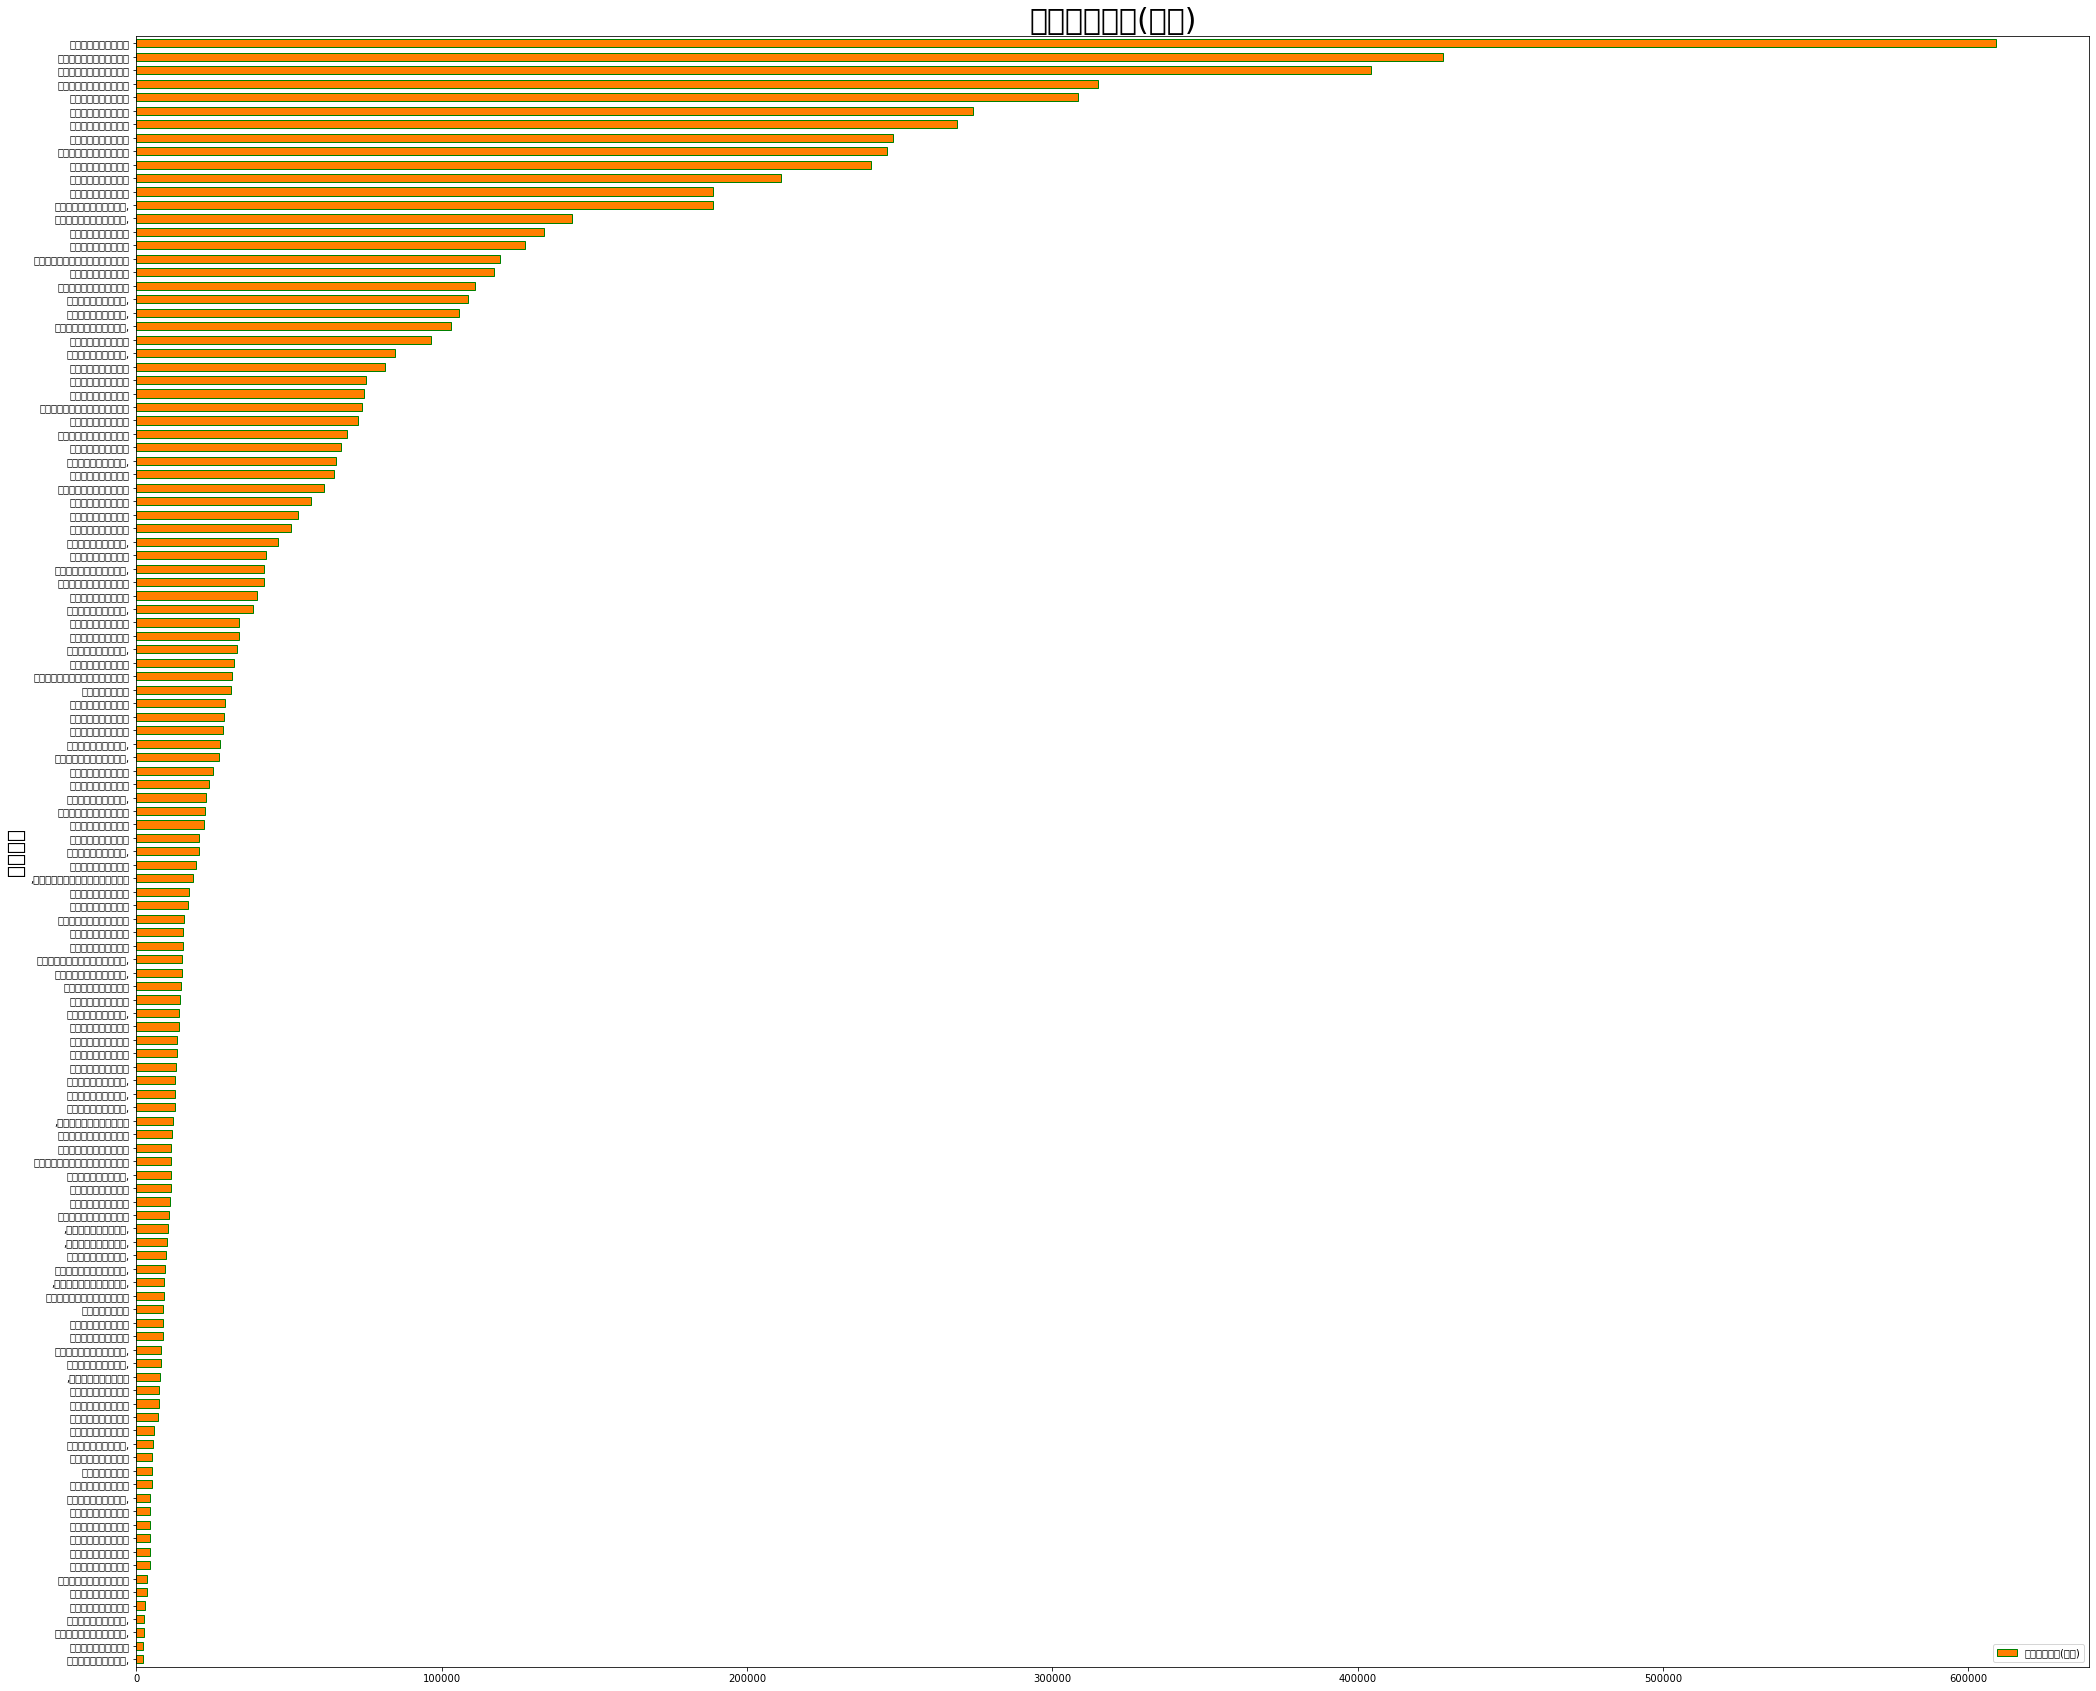

In [20]:
#统计“主承销商” 和“承销及保荐费(万元)”
data.groupby(["主承销商"])\
.agg({'承销及保荐费(万元)' : sum})\
.sort_values('承销及保荐费(万元)', ascending = True)\
.plot(kind = 'barh', legend = True, width=0.6, \
      figsize = [35,30], color = '#FF7F00', edgecolor = 'green')
plt.ylabel("主承销商", fontsize=20)
plt.title("承销及保荐费(万元)", fontsize=30)
#字体报错，往下拉有图表#

In [21]:
dataV2 = data.drop_duplicates(subset='名称')
dataV2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1322 entries, 0 to 1427
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   代码              1322 non-null   object        
 1   名称              1322 non-null   object        
 2   申购代码            1322 non-null   float64       
 3   招股日期            1322 non-null   datetime64[ns]
 4   网上发行日期          1322 non-null   datetime64[ns]
 5   上市日期            1322 non-null   datetime64[ns]
 6   上市板             1322 non-null   object        
 7   发行价格            1322 non-null   float64       
 8   发行市盈率           1322 non-null   float64       
 9   行业PE(披露值)       1322 non-null   float64       
 10  发行数量总计(万股)      1322 non-null   float64       
 11  新股发行数量(万股)      1322 non-null   float64       
 12  老股转让数量(万股)      1322 non-null   float64       
 13  网下配售数量(万股)      1322 non-null   float64       
 14  网上发行数量(万股)      1322 non-null   float64       
 15  回拨比例

Text(0, 0.5, '')

/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23567 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20225 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19994 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib

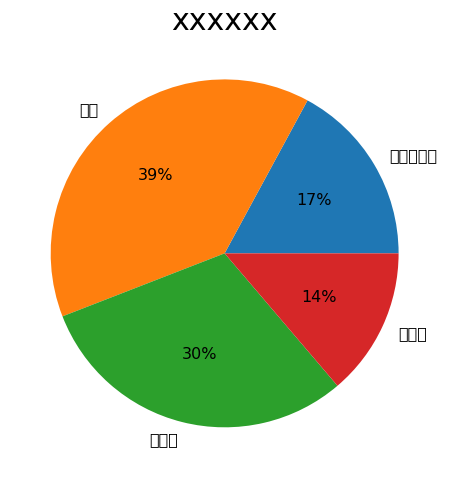

In [25]:
#统计分析“上市板”
df = dataV2.groupby('上市板').size()
df.plot(kind='pie', figsize=(8, 8), \
        textprops = {'fontsize':16, 'color':'k'}, autopct='%.0f%%')
plt.title("xxxxxx", fontsize=30)
plt.ylabel("")

Text(0.5, 1.0, '发行市盈率情况箱线图')

/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 34892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24066 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib

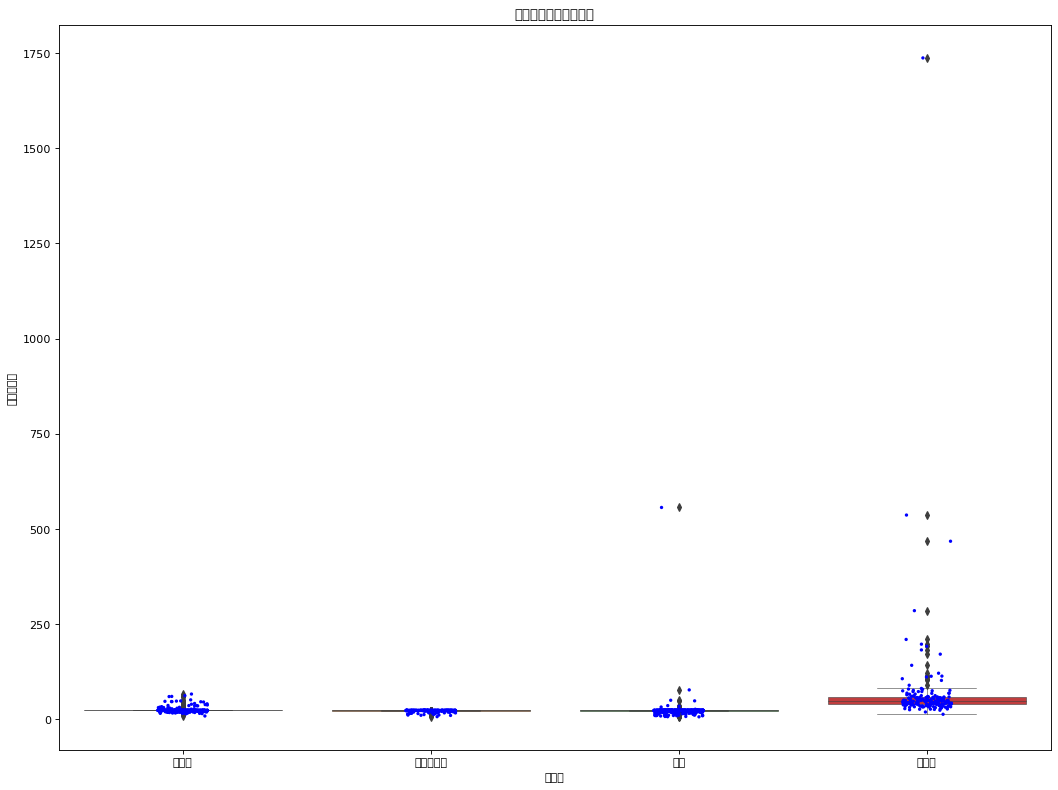

In [28]:
#统计分析发行市盈率
plt.figure(figsize=(16, 12), dpi=80)
sns.boxplot(x="上市板", y="发行市盈率", data=dataV2, linewidth = 0.5)
sns.stripplot(x='上市板', y='发行市盈率', data=dataV2, color='blue', size=3, jitter=1)
plt.title('发行市盈率情况箱线图')

In [27]:
#统计分析上市公司发行费用(万元)

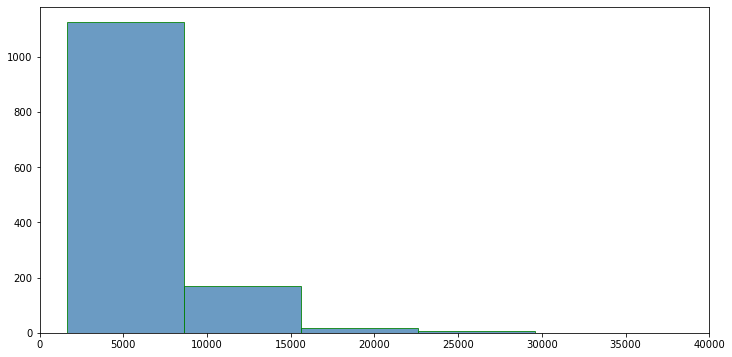

In [214]:
#辅助后面的分组，没啥用可以删
values = dataV2['上市公司发行费用(万元)']
plt.subplots(figsize=(12, 6))

plt.hist(values, alpha=0.8,
          histtype='bar', color='steelblue',
          edgecolor='green')
plt.xlim(xmin=0, xmax=40000)

plt.show()

Text(0.5, 1.0, '上市公司发行费用(万元)情况')

/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24066 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20844 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib

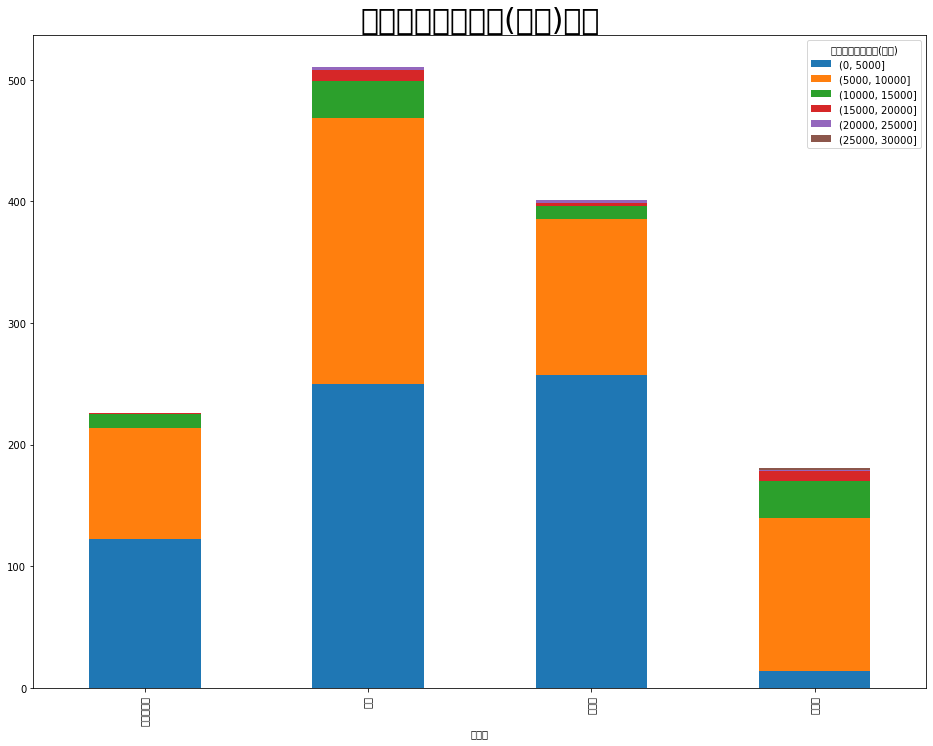

In [36]:
pd.set_option('mode.chained_assignment', None)
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000]
labels=['0~5000', '5000~10000', '10000~15000', '15000~20000', '20000~25000', '25000~30000']

dataV2['上市公司发行费用分布'] = pd.cut(dataV2['上市公司发行费用(万元)'], bins, labels)
dataV2.groupby(['上市板', '上市公司发行费用分布'])\
           .size().unstack()\
           .plot(kind = 'bar', stacked =True, figsize=(16, 12))
plt.legend(loc= 'best', title ='上市公司发行费用(万元)')
plt.title('上市公司发行费用(万元)情况', fontsize = 30)

Text(0.5, 1.0, '上市公司发行费用(万元)箱线图')

/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24066 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20844 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib

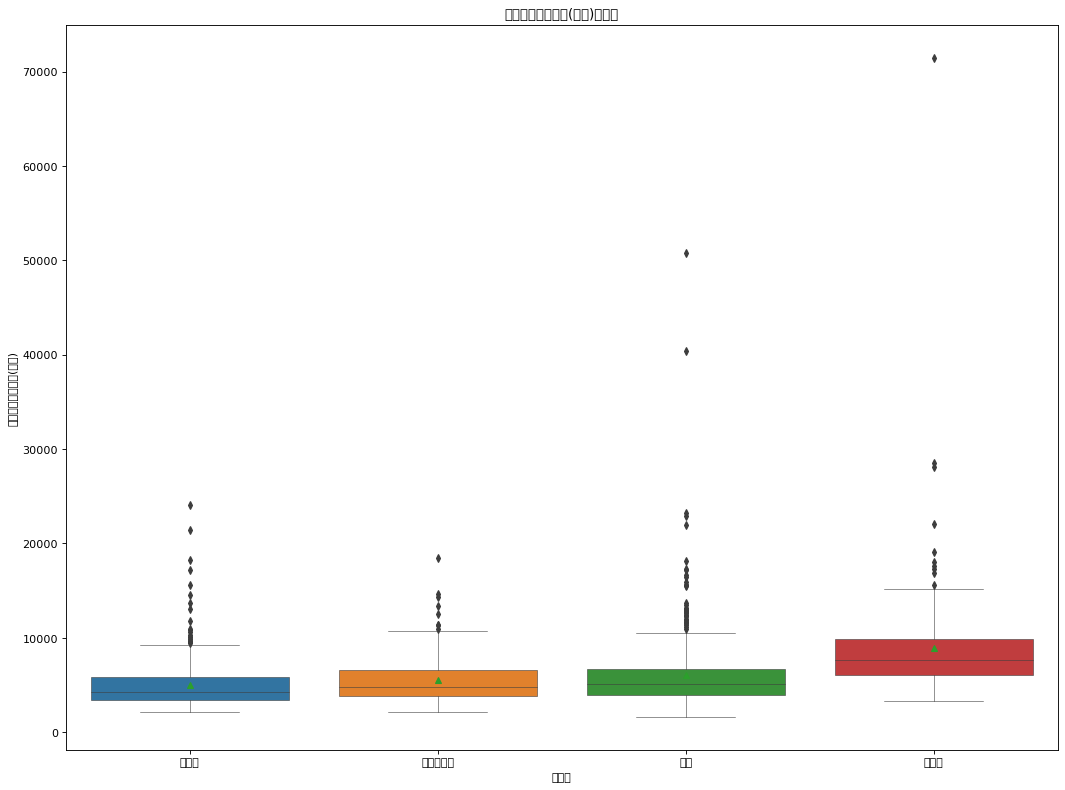

In [41]:

plt.figure(figsize=[16, 12], dpi=80)
sns.boxplot(x="上市板", y="上市公司发行费用(万元)", data=dataV2, linewidth = 0.5, showmeans = True)
#下面的代码可以加散点
#sns.stripplot(x='上市板', y='上市公司发行费用(万元)', data=dataV2, color='yellow', size=3, jitter=1)
plt.title('上市公司发行费用(万元)箱线图')

Text(0, 0.5, 'frequency')

/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 35745 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31639 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26426 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 36890 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib

/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31481 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 34276 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26837 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 33609 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib

/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 38395 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20986 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 29256 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 29123 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/

/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 35777 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 30417 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20250 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 34892 missing from current font.
  font.set_text(s, 0, flags=flags)


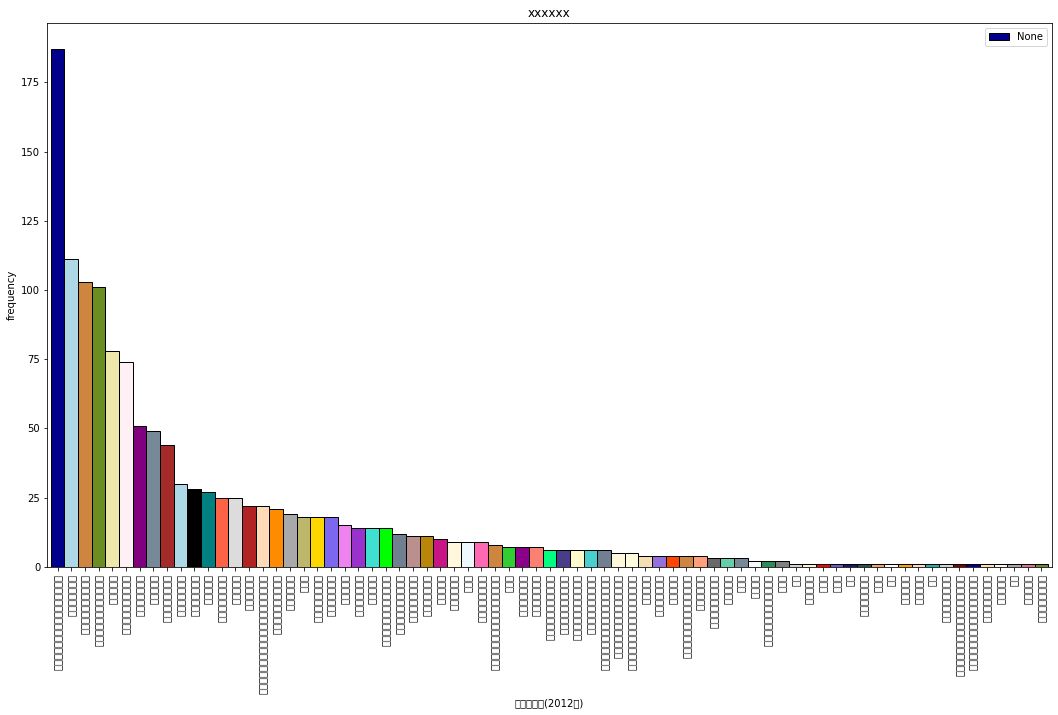

In [182]:
#证监会行业(2012版)
all_colors = list(plt.cm.colors.cnames.keys())
n = dataV2['证监会行业(2012版)'].unique().__len__()+1
random.seed(100)
c = random.choices(all_colors, k=n)
df = dataV2.groupby('证监会行业(2012版)').size().sort_values(ascending=False)
df.plot(kind='bar', figsize=(18, 10), legend=True, color = c, edgecolor = 'black', width = 1)
plt.title("xxxxxx")
plt.ylabel('frequency')

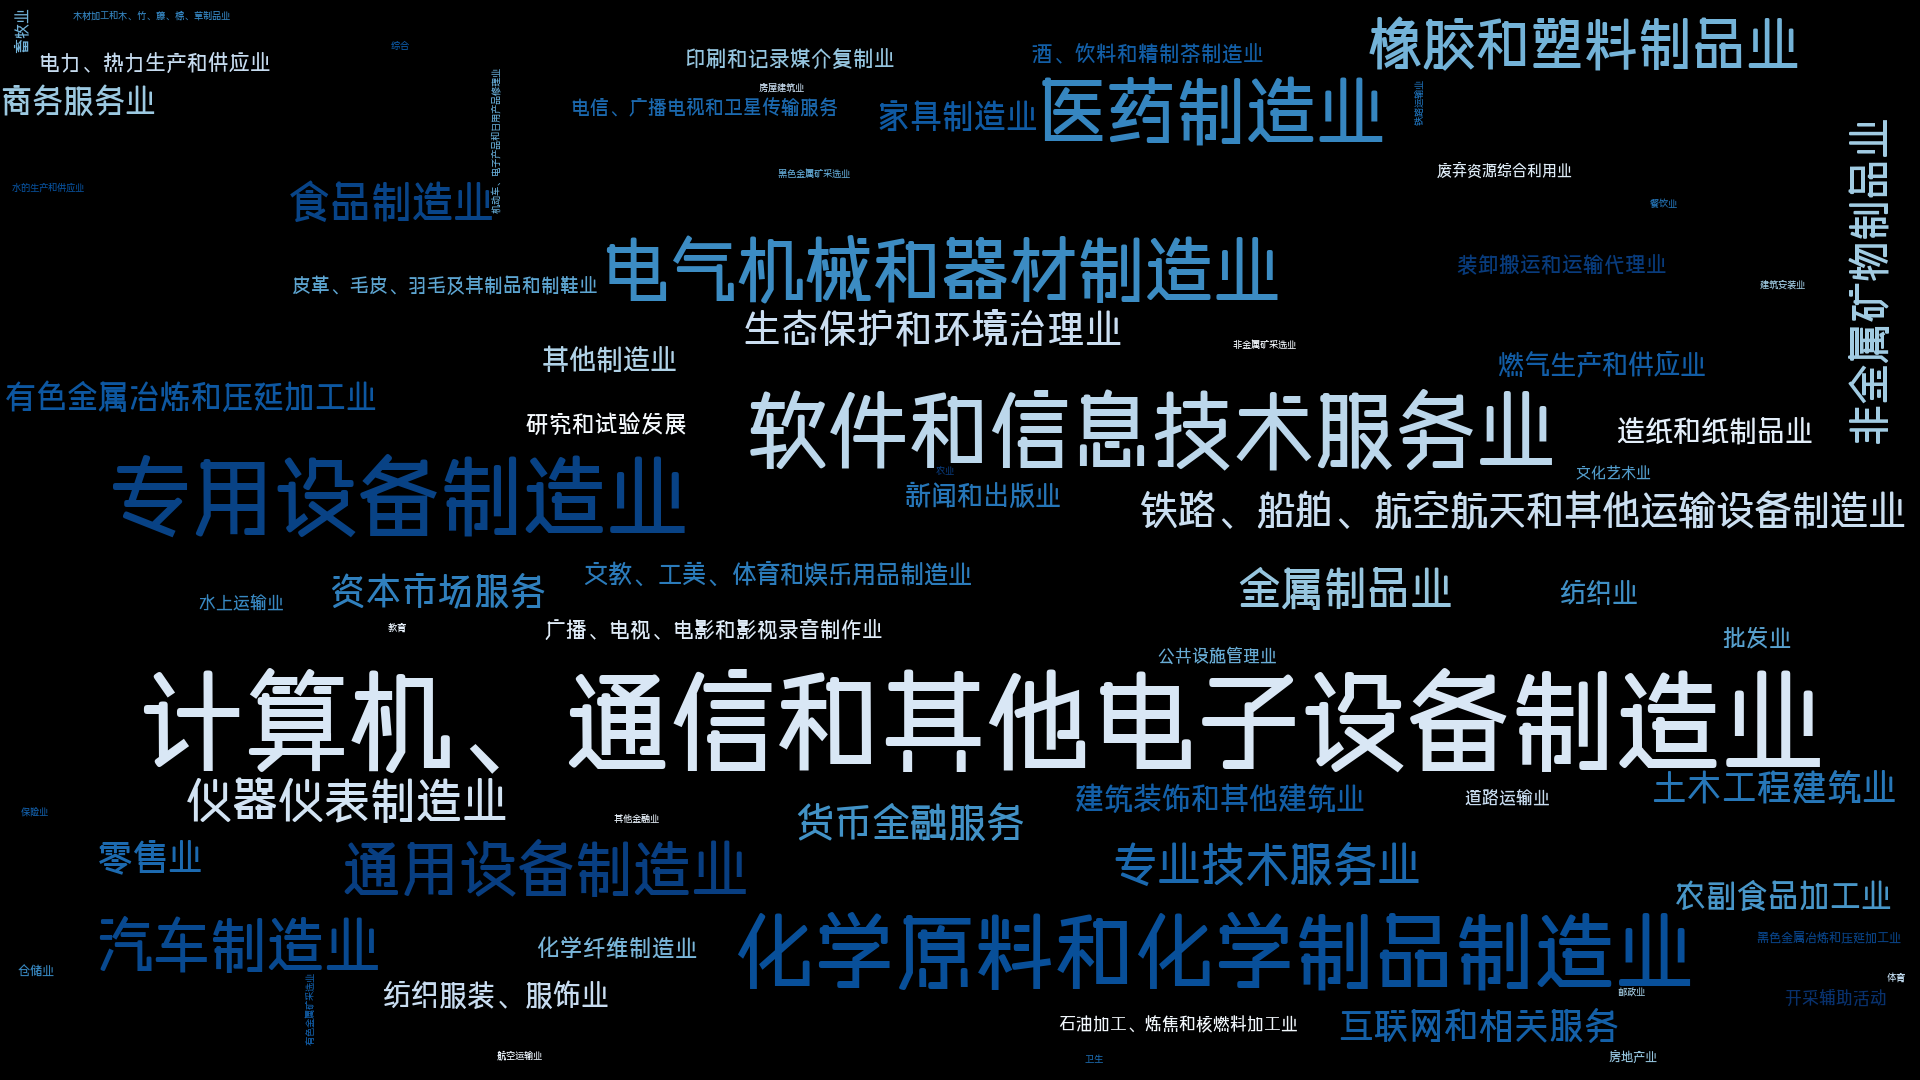

In [147]:
frequency ={}
frequency = dict(dataV2.groupby('证监会行业(2012版)').size())
wc = WordCloud(font_path = "/Library/Fonts/SanJiShaHeiJianTi-2.ttf", \
                      background_color = 'Black',\
                      width = 1920, height = 1080, colormap='Blues')
wc.generate_from_frequencies(frequency)
wc.to_image()


In [148]:
#省份
count =[]
count = dataV2.groupby('省份').size()
province = list(dict(count).keys())
sequence = list(zip(province,count))
map_1 = Map()
map_1.add("", sequence, "china")\
.set_global_opts(title_opts=opts.TitleOpts(title="全国各省"),visualmap_opts=opts.VisualMapOpts(max_=300,min_=0))
map_1.render_notebook()


In [149]:
#回归分析

In [50]:
cdf = dataV2[['包销比例', '上市首日涨跌幅%']]
cdf.head()

,包销比例,上市首日涨跌幅%
0,0.08,240.38
1,0.18,43.98
2,0.30,44.01
3,0.11,203.98
4,0.04,204.03


In [51]:
cdf.describe()

,包销比例,上市首日涨跌幅%
count,1322.000000,1322.000000
mean,0.205340,67.732549
std,0.123299,82.244496
min,0.000000,-2.150000
25%,0.140000,43.980000
50%,0.200000,44.000000
75%,0.260000,44.030000
max,2.000000,1061.420000


In [52]:
def at_a_glance(x, y):
    plt.scatter(x, y, color="g", label=y.name)
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.show()

In [53]:
def regression_analysis(x, y):
    
    #建立训练数据和测试数据
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
    
    #将训练数据特征转换成二维数组XX行*1列
    x_train=x_train.values.reshape(-1,1)
    #将测试数据特征转换成二维数组行数*1列
    x_test=x_test.values.reshape(-1,1)
    
    #使用sklearn对数据建模
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(x_train, y_train)
    
    #截距
    a=regressor.intercept_
    #回归系数
    b=regressor.coef_
    print('最佳拟合线：截距a=',a,' 回归系数b=',b)
    
    #绘制输出
    plt.scatter(x_train, y_train, color='g', label="train data")
    y_train_pred = regressor.predict(x_train)
    plt.plot(x_train, y_train_pred, color='black', linewidth=3, label="best line")
    plt.legend(loc=2)
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.show()
    
    #使用测试数据评估模型
    y_test_predict=regressor.predict(x_test)
    print("Residual mean of squares: %.2f" % np.mean((y_test_predict - y_test) ** 2))
    print('Variance score: %.2f' % regressor.score(x_test , y_test))
    #print('解释方差: %.2f' % (1-np.var(y_test-y_test_predict)/np.var(y_test)))
    
    plt.scatter(x_train, y_train, color='blue', label="train data")
    y_train_pred = regressor.predict(x_train)
    plt.plot(x_train, y_train_pred, color='black', linewidth=3, label="best line")
    plt.scatter(x_test, y_test, color='red', label="test data")
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.legend(loc = 'best')
    plt.show()

/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 38144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20363 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib

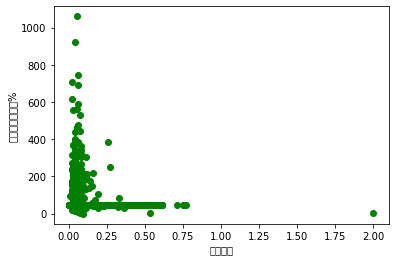

In [54]:
#包销比例” 与 "上市首日涨跌幅%"的相关性程度
x = cdf.loc[:,'包销比例']
y1 = cdf.loc[:,'上市首日涨跌幅%']
at_a_glance(x, y1)

最佳拟合线：截距a= 104.79518292009212  回归系数b= [-196.93108029]


/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 38144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20363 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib

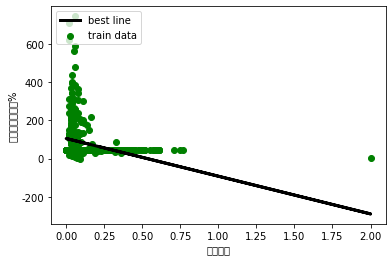

Residual mean of squares: 9632.31
Variance score: 0.11


/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 38144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20363 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib

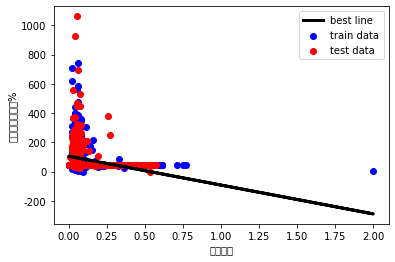

In [55]:
regression_analysis(x, y1) 

/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 36164 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24635 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 39069 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20844 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib

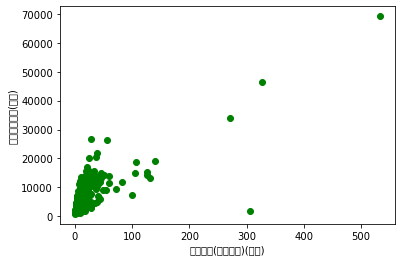

In [56]:
cdf = dataV2[['募资总额(上市公司)(亿元)', '承销及保荐费(万元)']]
x = cdf.loc[:,'募资总额(上市公司)(亿元)']
y = cdf.loc[:,'承销及保荐费(万元)']
at_a_glance(x, y)

最佳拟合线：截距a= 3609.204122046256  回归系数b= [109.00522787]


/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 36164 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24635 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 39069 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib

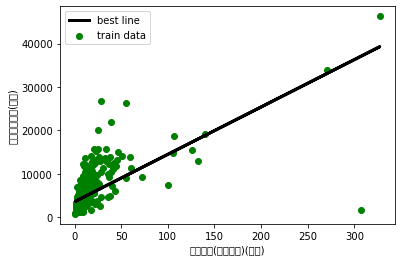

Residual mean of squares: 3533169.25
Variance score: 0.78


/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 36164 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24635 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 39069 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/liulizhao/anaconda3/lib/python3.8/site-packages/matplotlib

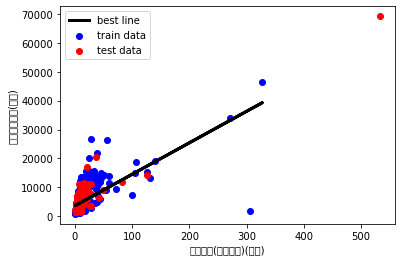

In [57]:
regression_analysis(x, y)